### Larsen & Toubro's Construction and Mining Business sold various heavy machinery and equipments. Spare part supply was crucial to avoid losses. from previous forecasting  it became imperative to devise a foolproof method for managing 20,000 different spare parts. Developing 20,000 forecasting models would have been too time-consuming and costly. Therefore, Vijaya Kumar sought a quick and efficient solution to implement a nationwide forecasting strategy.

    To perform ARIMA forecasting on the given dataset, we first need to clean and preprocess the data. We can start by removing any missing values or outliers in the dataset. Then, we can convert the date column into a datetime format and set it as the index of the dataframe.
    
    Next, we can perform exploratory data analysis (EDA) to understand the patterns and relationships in the data. This can include visualizing the time series plot, checking for autocorrelation, partial autocorrelation, and cross-correlation between variables.
    
    Based on the EDA results, we can select appropriate models for each variable. For example, we can use an ARIMA(p, d, q) model for the "demand" variable, where p is the number of autoregressive terms, d is the degree of differencing, and q is the number of moving average terms. We can also consider seasonal components if there are strong seasonal patterns in the data.
    
    Once we have selected the models for each variable, we can fit them to the data using Python's statsmodels library. We can then use the fitted models to generate forecasts for future periods.
    

#### To perform a time series analysis of the given data
        
    Visualization: Plotting the data on a timeline to identify patterns and trends.
        
    Summary statistics: Calculating metrics such as mean, standard deviation, minimum, maximum, etc. to understand the central tendency and variability of the data.
        
    Seasonal decomposition: Breaking down the time series into its trend, seasonal, and residual components using techniques such as STL decomposition or seasonal decompositions.
        
    Autocorrelation analysis: Examining the correlation between values at different time lags to identify patterns and relationships in the data.
        
    Forecasting: Using models such as ARIMA, Prophet, or LSTM to predict future values based on past behavior.
        
    Anomaly detection: Identifying unusual or unexpected patterns in the data that may indicate errors or interesting events.

In [255]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose


In [222]:
# Load the data
sales = pd.read_excel('IMB501-XLS-ENG.xlsx', parse_dates=True, index_col=0)


In [154]:
# Summary statistics
sales.describe()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
count,49.000000,48.000000,48.000000,48.000000,48.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2458.081633,21.479167,17.791667,0.458333,3.937500,500.836735,290.816327,463.510204,485.224490,619.755102,37.408163
std,950.192828,28.816359,39.820319,0.682870,4.549521,137.796853,53.591695,85.620316,202.830211,149.594804,18.632318
min,1245.000000,0.000000,0.000000,0.000000,0.000000,299.000000,196.000000,294.000000,103.000000,373.000000,10.000000
25%,1829.000000,0.000000,0.000000,0.000000,0.750000,392.000000,255.000000,416.000000,337.000000,522.000000,22.000000
50%,2196.000000,10.500000,1.000000,0.000000,2.000000,482.000000,285.000000,461.000000,473.000000,605.000000,35.000000
75%,2793.000000,31.250000,10.000000,1.000000,5.250000,609.000000,315.000000,527.000000,634.000000,707.000000,46.000000
max,6786.000000,130.000000,207.000000,3.000000,20.000000,864.000000,397.000000,629.000000,842.000000,990.000000,82.000000


In [155]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2009-04-01 to 2013-04-01
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   205-70-N1190     49 non-null     int64  
 1   PC_198_27_42263  48 non-null     float64
 2   PC_203_32_51461  48 non-null     float64
 3   PC_600_863_4210  48 non-null     float64
 4   PC_6735_61_3410  48 non-null     float64
 5   D30141135        49 non-null     int64  
 6   600-181-6740I.   49 non-null     int64  
 7   07063-51210I.    49 non-null     int64  
 8   600-319-4540I.   49 non-null     int64  
 9   6735-51-5143I    49 non-null     int64  
 10  07000-B2011I.    49 non-null     int64  
dtypes: float64(4), int64(7)
memory usage: 4.6 KB


<Axes: xlabel='Month'>

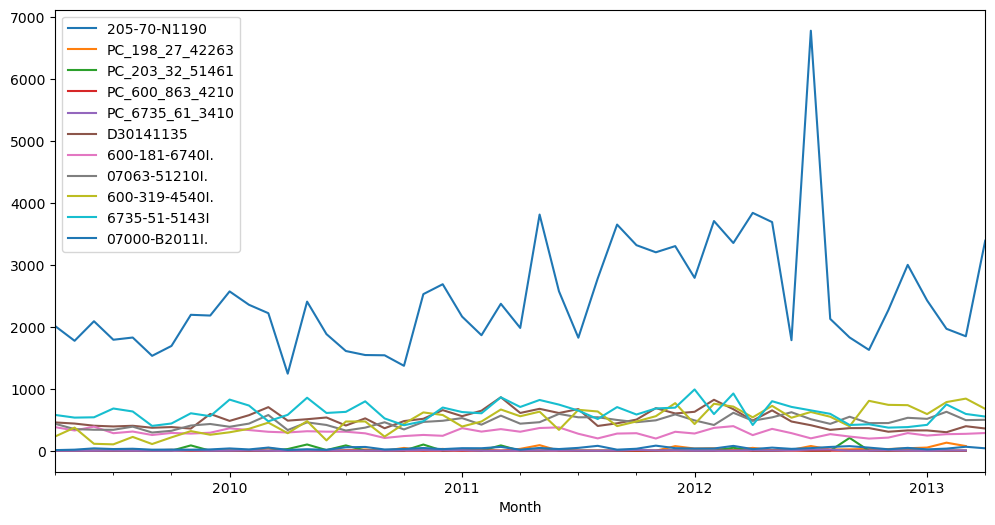

In [156]:
# Visualize the time series
sales.plot(kind='line', figsize=(12,6))

### ***Time series that lack trends or seasonality are considered stationary, meaning that their statistical properties, such as the mean or variance, remain constant throughout the observation period.***


In [157]:
# Autocorrelation analysis
adfuller_result = adfuller(sales['205-70-N1190'])
print(adfuller_result)

(-5.499315051161123, 2.0886124359695017e-06, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 621.7702093889523)


### interpret the output values for part 205-70-N1190':
***
 ADF statistic: -5.499315051161123
 
 P-value: 2.0886124359695017e-06

Since the p-value is less than .05, we accept the null hypothesis.

This means the time series is stationary. In other words, it has time-independent structure and constant variance over time.
 
 p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
 
 p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
 ***


array([[<Axes: title={'center': '205-70-N1190'}>,
        <Axes: title={'center': 'PC_198_27_42263'}>,
        <Axes: title={'center': 'PC_203_32_51461'}>],
       [<Axes: title={'center': 'PC_600_863_4210'}>,
        <Axes: title={'center': 'PC_6735_61_3410'}>,
        <Axes: title={'center': 'D30141135'}>],
       [<Axes: title={'center': '600-181-6740I.'}>,
        <Axes: title={'center': '07063-51210I.'}>,
        <Axes: title={'center': '600-319-4540I.'}>],
       [<Axes: title={'center': '6735-51-5143I'}>,
        <Axes: title={'center': '07000-B2011I.'}>, <Axes: >]],
      dtype=object)

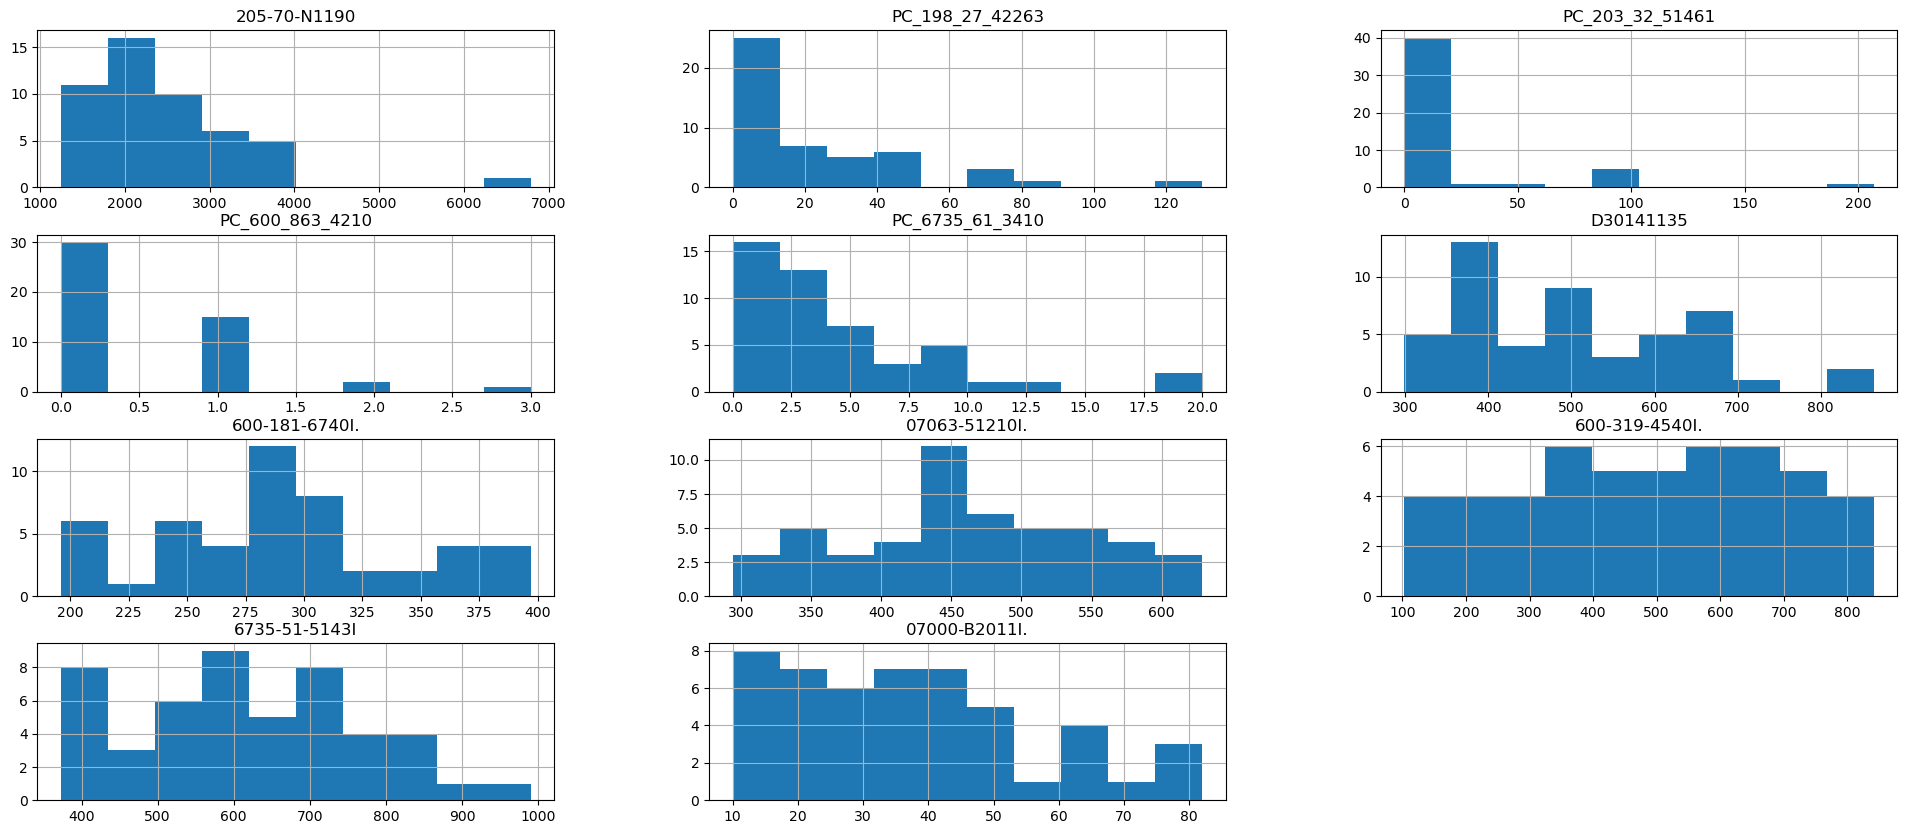

In [158]:
sales.hist(figsize=(24,10))

In [159]:
# Autocorrelation analysis
adfuller_result = adfuller(sales['07063-51210I.'])
print(adfuller_result)

adfuller_result = adfuller(sales['600-181-6740I.'])
print(adfuller_result)

(-1.7227759826853197, 0.419417453675484, 2, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 422.44678393498776)
(-4.9216476894432, 3.164403730175954e-05, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 399.5901871953267)


In [160]:
machine_part = sales['07063-51210I.']

### From above graph we choose 07063-51210I. because of gaussian like distribution of values
***
 interpret the output values for part '07063-51210I.':

 ADF statistic: -1.7227759826853197
 
 P-value: 0.419417453675484

Since the p-value is more than .05, we reject the null hypothesis.

This means the time series is non-stationary. In other words, it has time-dependent structure and does not hold constant variance over time.
 ***


### SARIMAX Model

In [161]:
# Forecasting (ARIMA model)
order = (1,1,1)
model = SARIMAX(sales['07063-51210I.'], order = (1,1,1))
results = model.fit()
forecast = results.forecast(steps=30)
print(forecast)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57660D+00    |proj g|=  3.05641D-02

At iterate    5    f=  5.57380D+00    |proj g|=  4.49946D-03

At iterate   10    f=  5.56968D+00    |proj g|=  4.77532D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   5.904D-06   5.567D+00
  F =   5.5673687848749775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2013-05-01    521.462664
2013-06-01    518.750963
2013-07-01    519.09

/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


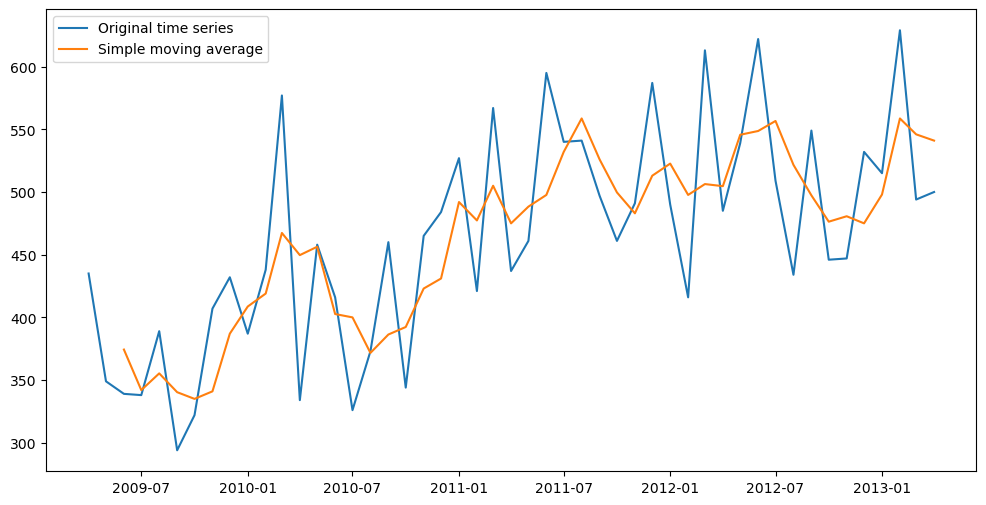

In [162]:
# Anomaly detection (simple moving average)
plt.subplots(figsize=(12, 6))
window_size = 3
rolling_mean = sales['07063-51210I.'].rolling(window=window_size).mean()
plt.plot(sales['07063-51210I.'])
plt.plot(rolling_mean)
plt.legend(['Original time series', 'Simple moving average'])
plt.show()

In [163]:
machine_part_1 = np.log(machine_part)

In [164]:
# Autocorrelation analysis
adfuller_result = adfuller(machine_part_1)
print(adfuller_result)

(-2.047406990809599, 0.26618112445447367, 5, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, -35.45674224813337)


### After altering 07063-51210I. using log 
***
 interpret the output values for part '07063-51210I.':

 ADF statistic: -2.047406990809599
 
 P-value: 0.26618112445447367

Since the p-value is more than .05, we reject the null hypothesis.

This means the time series is non-stationary. In other words, it has time-dependent structure and does not hold constant variance over time.
***

In [165]:
machine_part_2 = machine_part - machine_part.shift()
machine_part_2.dropna(inplace=True)
adfuller_result = adfuller(machine_part_2)
print(adfuller_result)

(-4.361414357233933, 0.00034715026254001247, 4, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 421.9832791265393)


In [166]:
# Mentioned below
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    plt.subplots(figsize=(12, 6))

    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    sales_test = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(sales_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in sales_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### After altering 07063-51210I. after differenicing in time series
***
 interpret the output values for part '07063-51210I.':

 ADF statistic: -4.361414357233933
 
 P-value: 0.00034715026254001247

Since the p-value is less than .05, we accept the null hypothesis, Hence remains stationary
***

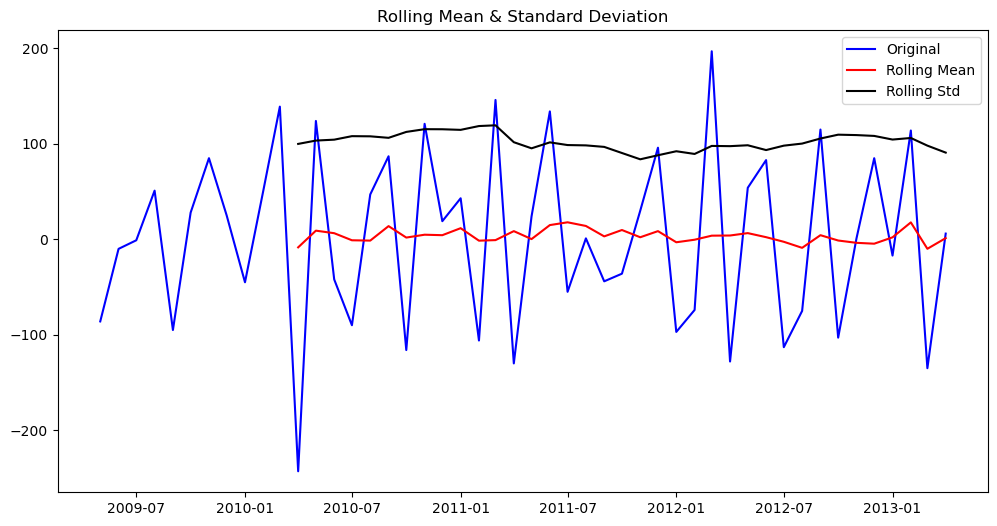

Results of Dickey Fuller Test:
Test Statistic                 -4.361414
p-value                         0.000347
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [167]:
test_stationarity(machine_part_2)

### ADF test statistic is above critical values & p value is significantly below 0.05

### Decompose into Seasonal, Trend, Residual

/tmp/ipykernel_226/1004031903.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


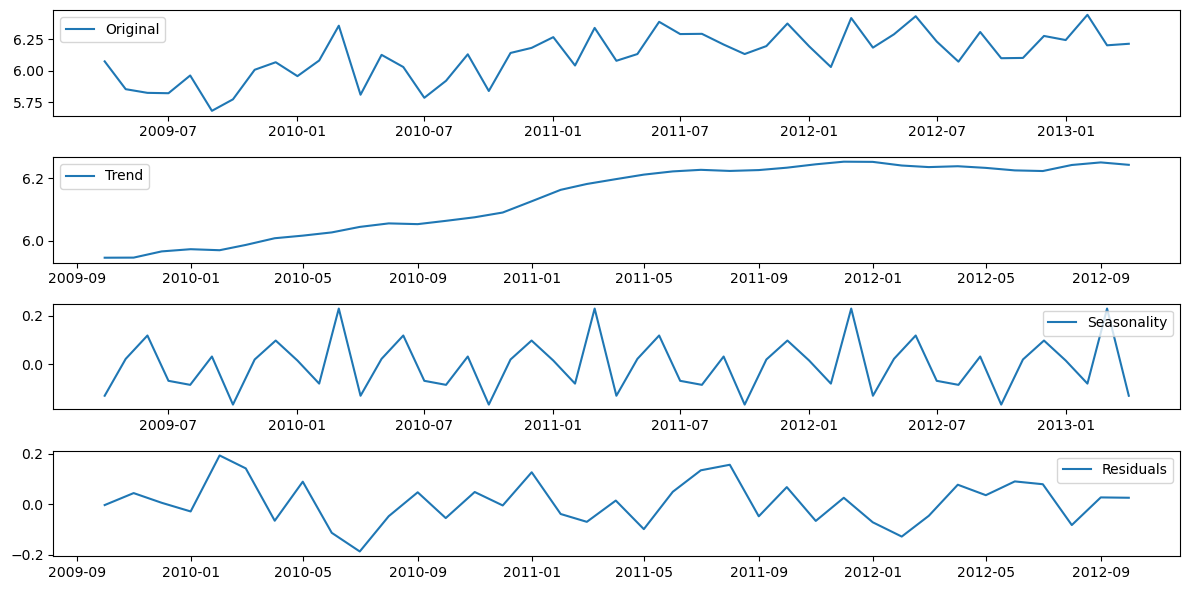

In [168]:
plt.subplots(figsize=(12, 6))

decomposition = seasonal_decompose(machine_part_1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(machine_part_1, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### ARIMA MODEL

    PACF and ACF will help us determine p and q values. for Stationary and nonstationary series


In [242]:
machine_part_2 = machine_part - machine_part.shift()
machine_part_2.dropna(inplace=True)
adfuller_result = adfuller(machine_part_2)
print(adfuller_result)

(-4.361414357233933, 0.00034715026254001247, 4, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 421.9832791265393)


/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


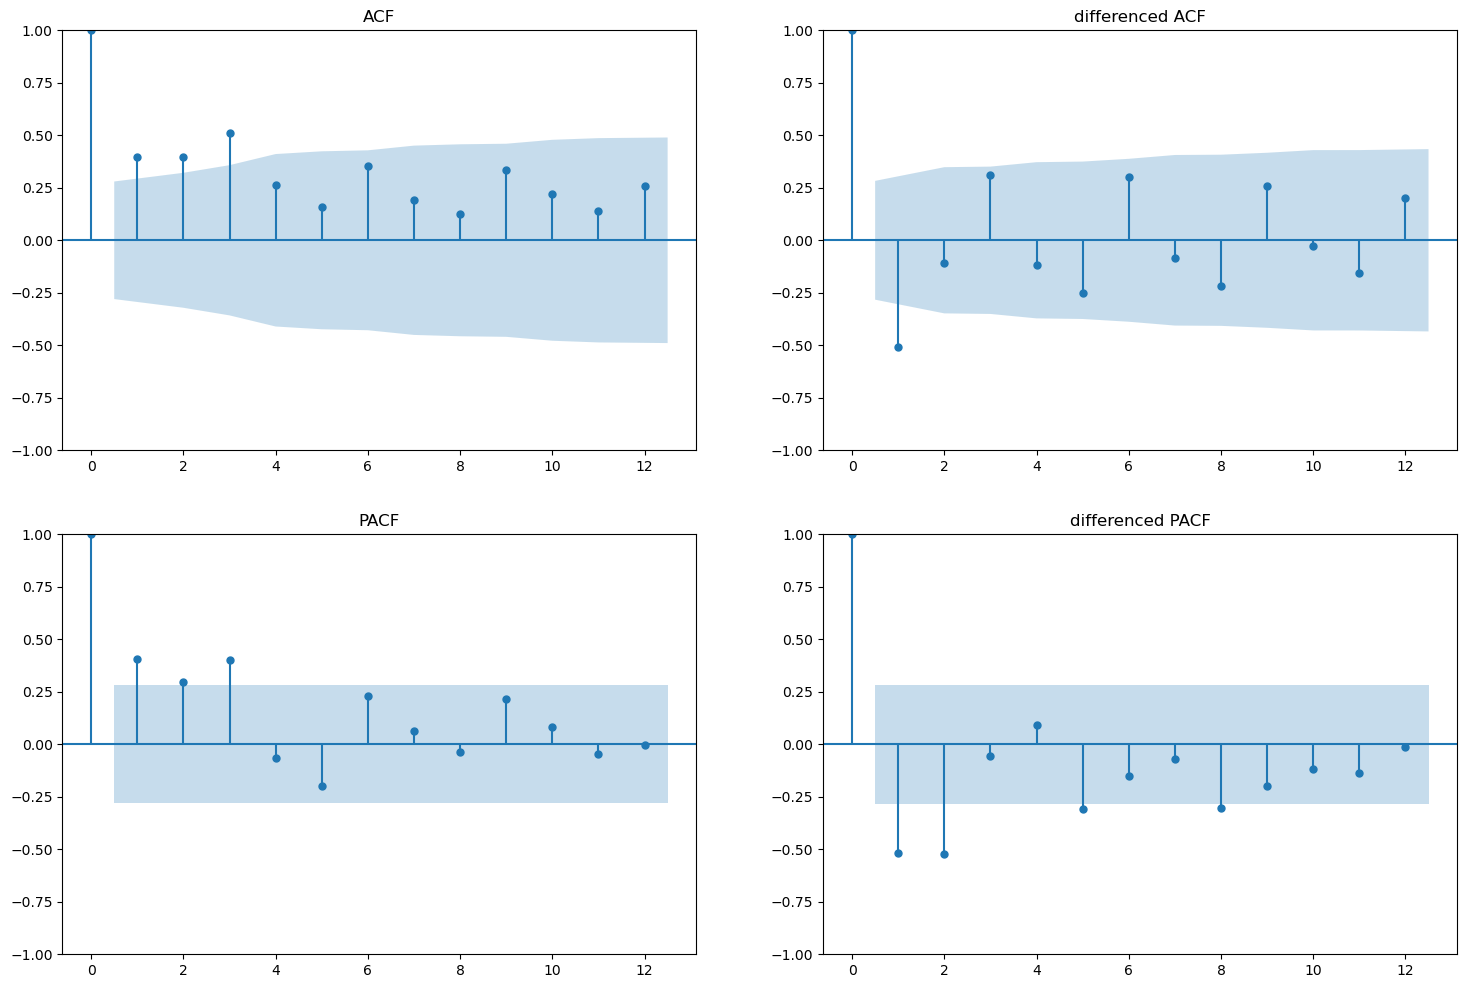

In [169]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
ax[0, 0] = plot_acf(machine_part, ax=ax[0, 0], lags=12, title="ACF")
ax[1, 0] = plot_pacf(machine_part, ax=ax[1, 0], lags=12, title="PACF")

ax[0, 1] = plot_acf(machine_part_2 , ax=ax[0, 1], lags=12, title="differenced ACF")
ax[1, 1] = plot_pacf(machine_part_2, ax=ax[1, 1], lags=12, title="differenced PACF")

#### We derive the values of p and q

***The ACF now has few significant values after first differencing.***

### Applying seasonal differencing on the autocorrelation plots and observing the change.

In [247]:
machine_part_2 = machine_part - machine_part.shift(12)
machine_part_2.dropna(inplace=True)
adfuller_result = adfuller(machine_part_2)
print(adfuller_result)

(-5.8228214324574585, 4.144645668595762e-07, 0, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 309.1878951669258)


/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


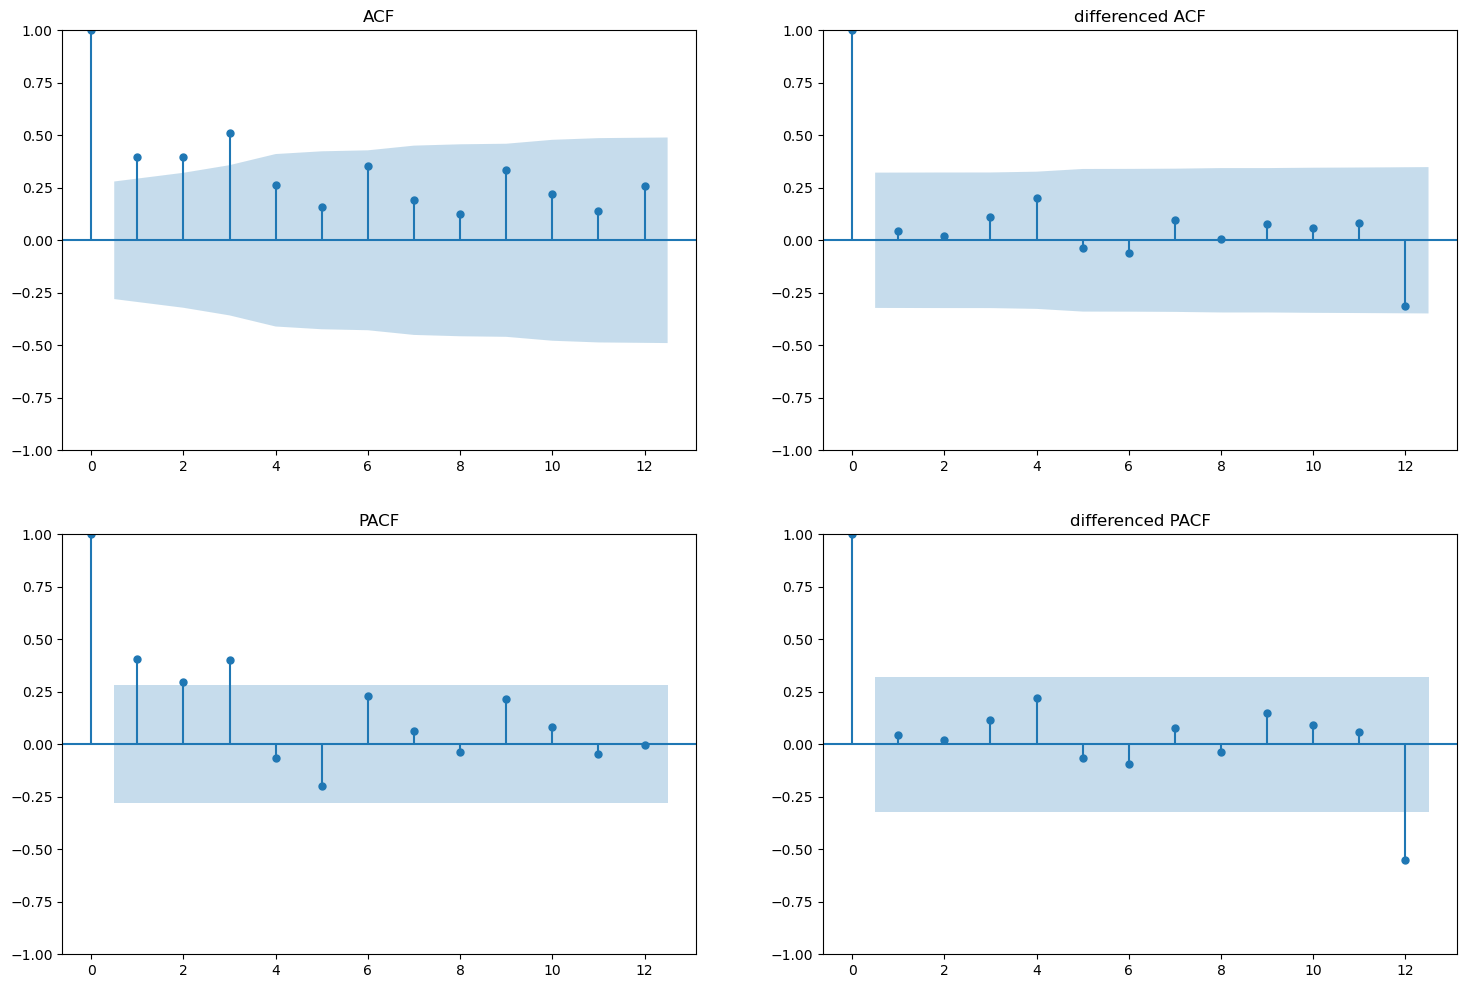

In [248]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
ax[0, 0] = plot_acf(machine_part, ax=ax[0, 0], lags=12, title="ACF")
ax[1, 0] = plot_pacf(machine_part, ax=ax[1, 0], lags=12, title="PACF")

ax[0, 1] = plot_acf(machine_part_2 , ax=ax[0, 1], lags=12, title="differenced ACF")
ax[1, 1] = plot_pacf(machine_part_2, ax=ax[1, 1], lags=12, title="differenced PACF")

### Preprocess the data

In [236]:
scaler = MinMaxScaler() 
df_subset = sales.loc[:, ['07063-51210I.']]
sales_scaled = scaler.fit_transform(df_subset)

### Scale the data using Min-Max Scaler to improve the model's performance:

In [235]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_subset)

### Split the scaled data into training and testing sets:

In [234]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [237]:
#create an ARIMA model and fit it to the training data:
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

### Generate forecasts for the next 12 months (1 year):

In [238]:
forecast = model_fit.forecast(steps=12)

### Create a new DataFrame with the predicted values and the actual values for the testing set:

In [239]:
forecast_df = pd.DataFrame(forecast, columns=['predicted'])
actual_df = pd.DataFrame(test_data, columns=['actual'])

### Visualize the results:

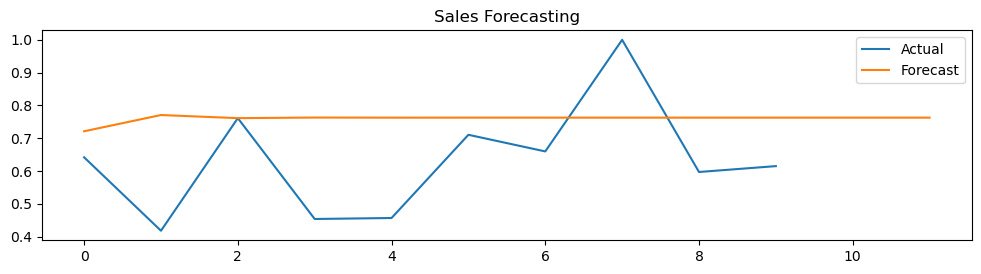

In [231]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(actual_df['actual'], label='Actual')
plt.plot(forecast_df['predicted'], label='Forecast')
plt.legend()
plt.title('Sales Forecasting')
plt.show()

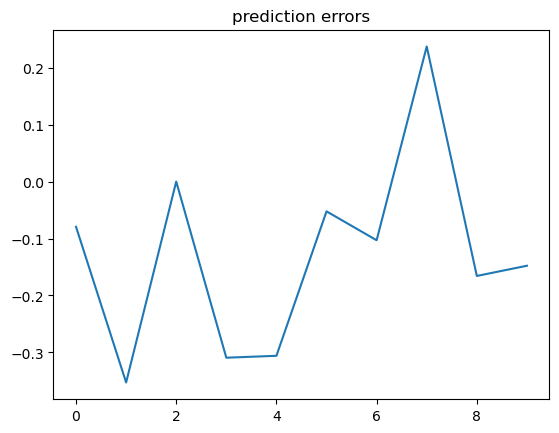

In [259]:
# Calculate the prediction errors
errors = actual_df['actual'] - forecast_df['predicted']

# Plot the prediction errors
plt.title('prediction errors')
plt.plot(errors)

### ARIMA Model

In [ ]:
# Split the data into training and testing sets
train_size = int(len(sales_scaled) * 0.7)
train_df = sales_scaled[:train_size]
test_df = sales_scaled[train_size:]

In [ ]:
# Define the order of the ARIMA model
p = 1 # number of autoregressive terms
d = 1 # degree of differencing
q = 1 # number of moving average terms

In [ ]:
# Define the Sarimax model
model = SARIMAX(train_df, order=(p, d, q))

# Estimate the model parameters
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30435D-01    |proj g|=  4.24149D-01

At iterate    5    f= -1.33098D-01    |proj g|=  7.78738D-02

At iterate   10    f= -1.33792D-01    |proj g|=  5.10652D-02

At iterate   15    f= -1.34533D-01    |proj g|=  2.01173D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   1.667D-06  -1.345D-01
  F = -0.13454039053286398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [ ]:
# Generate forecasts for the test set
forecasts = results.forecast(steps=len(test_df))

In [ ]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(forecasts - test_df))
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.15681853723785588


In [ ]:

# Use auto_arima to automatically find the best ARIMA model order
model = pm.auto_arima(sales_scaled, seasonal=False, stepwise=True, trace=True)

# Fit the best model
model.fit(sales_scaled)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3.689, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17.889, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5.620, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15.899, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6.403, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5.686, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-4.587, Time=0.31 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 6.936 seconds
                               SARIMAX Results                     

In [ ]:
model = ARIMA(sales_scaled, order= (1, 1, 1))
result = model.fit()

In [ ]:
sales_scaled_df = pd.DataFrame(sales_scaled)
forecasts = result.forecast(steps=50)

## function consisting of stationary data checking and ADCF testing -- class file

In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    plt.subplots(figsize=(12, 6))

    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    sales_test = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(sales_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in sales_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

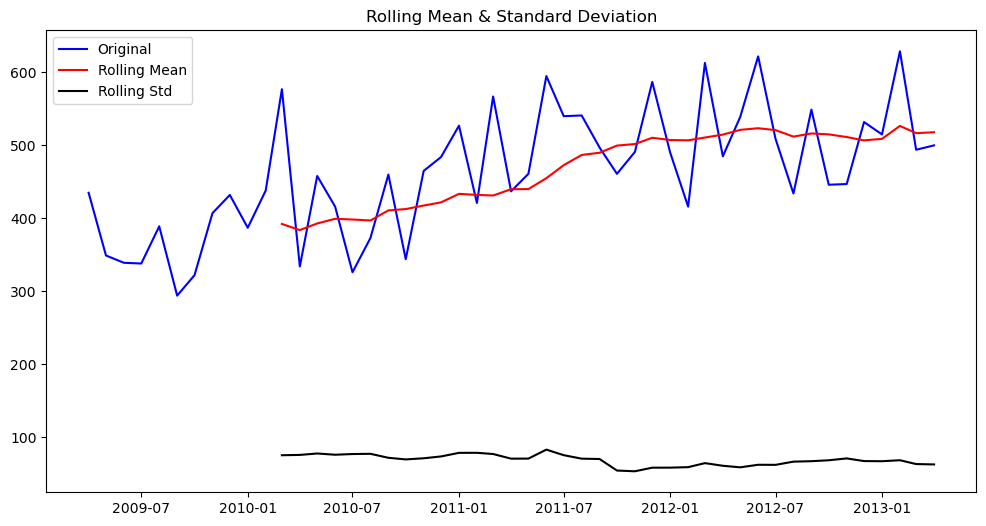

Results of Dickey Fuller Test:
Test Statistic                 -1.722776
p-value                         0.419417
#Lags Used                      2.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [ ]:
test_stationarity(machine_part)

In [ ]:
machine_part_log = np.log(machine_part)

In [ ]:
rollmean_log = machine_part_log.rolling(window=12).mean()
rollstd_log = machine_part_log.rolling(window=12).std()

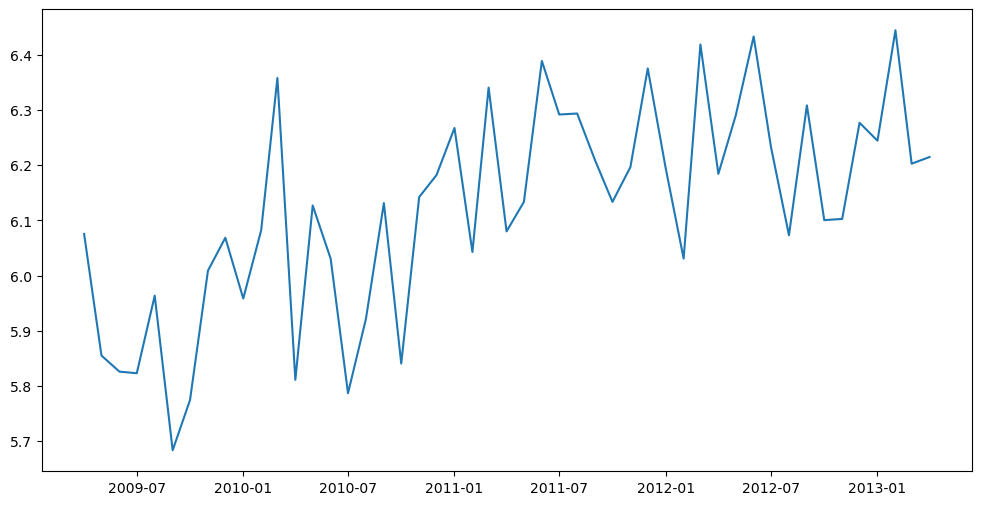

In [ ]:
plt.subplots(figsize=(12, 6))
plt.plot(machine_part_log)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

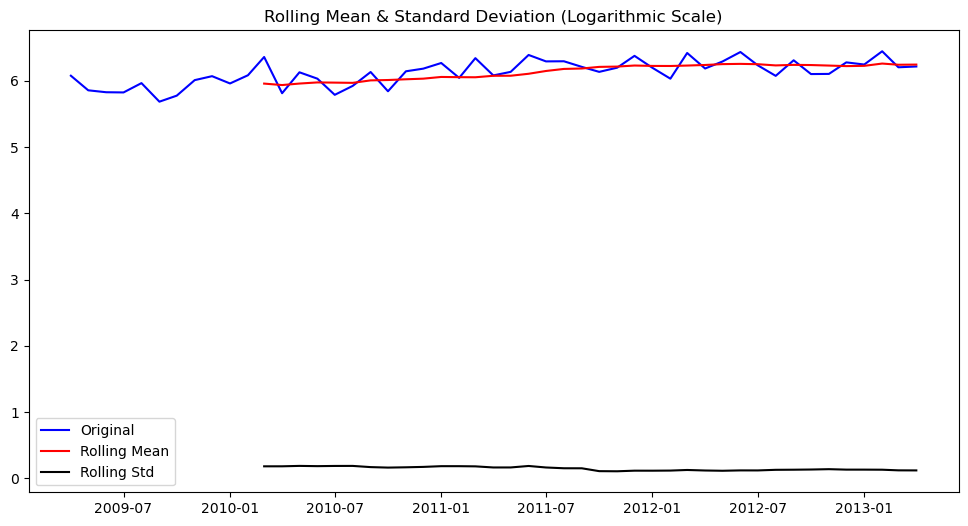

In [ ]:
plt.subplots(figsize=(12, 6))
plt.plot(machine_part_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [ ]:
machine_part_new = machine_part_log - rollmean_log
machine_part_new.dropna(inplace=True)

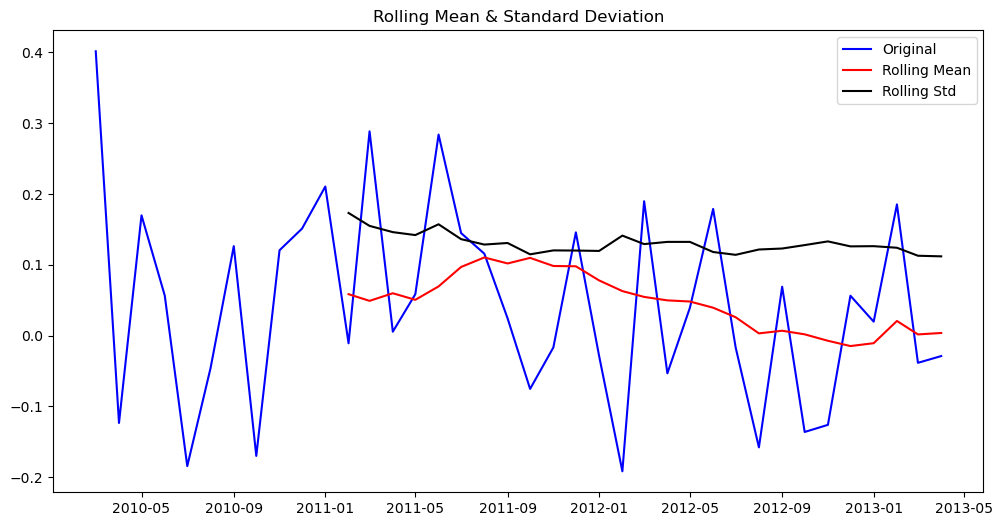

Results of Dickey Fuller Test:
Test Statistic                -7.434073e+00
p-value                        6.250029e-11
#Lags Used                     0.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


In [ ]:
test_stationarity(machine_part_new)

### After subtracting 07063-51210I.'s log value with its rolling mean

 interpret the output values for part '07063-51210I.':

 ADF statistic: -7.434073e+00
 
 P-value: 6.250029e-11

### we arive the p-value less than .05, we accept the null hypothesis.

This means the time series is stationary. In other words, it has time-dependent structure and does not hold constant variance over time.

So we can now say that given series is now **STATIONARY**

/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


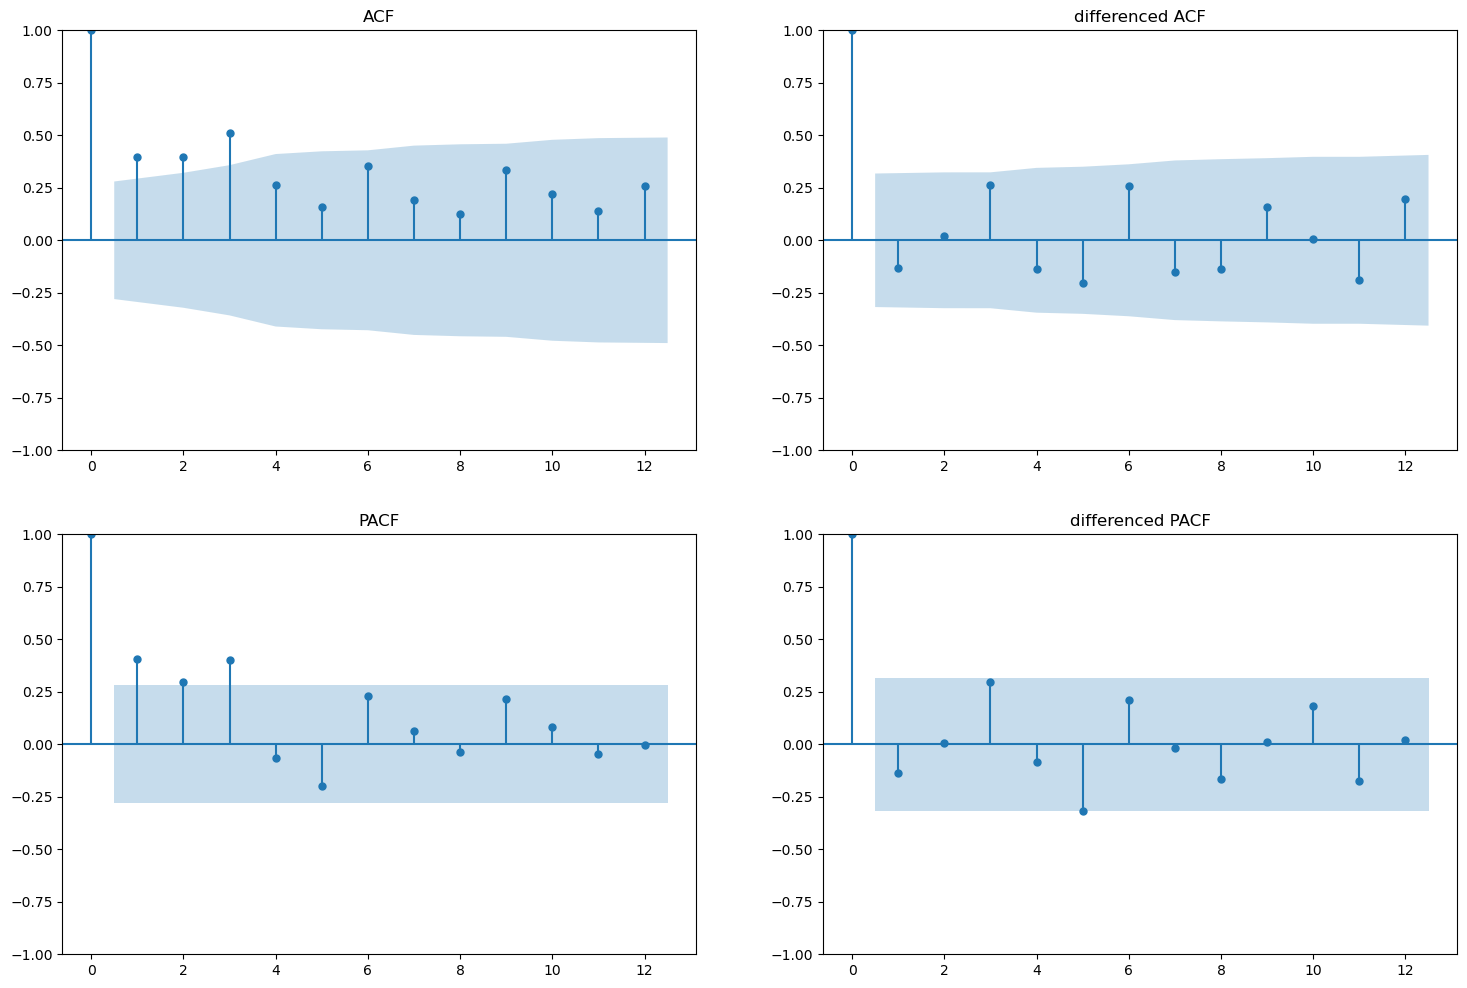

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
ax[0, 0] = plot_acf(machine_part, ax=ax[0, 0], lags=12, title="ACF")
ax[1, 0] = plot_pacf(machine_part, ax=ax[1, 0], lags=12, title="PACF")

ax[0, 1] = plot_acf(machine_part_new , ax=ax[0, 1], lags=12, title="differenced ACF")
ax[1, 1] = plot_pacf(machine_part_new, ax=ax[1, 1], lags=12, title="differenced PACF")

### Plotting ACF & PACF

In [ ]:
lag_acf = acf(machine_part_new, nlags=10)
lag_pacf = pacf(machine_part_new, nlags=10, method='ols')

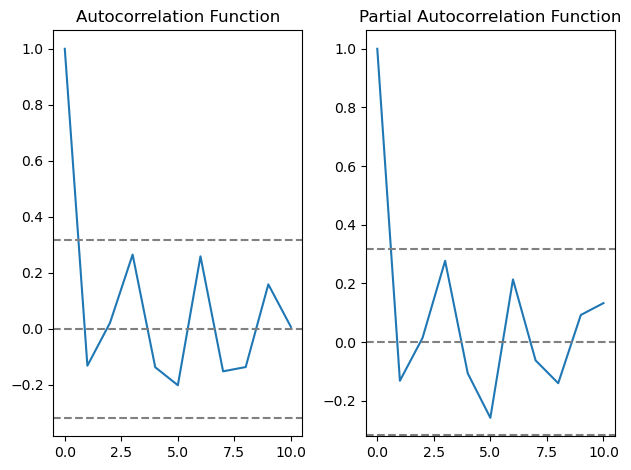

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(machine_part_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(machine_part_new)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(machine_part_new)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(machine_part_new)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

### From ACF graph we find Q value and from PACF we calculate P value

## References

class file: air-passengers-time-series-arima.ipynb

class file: Time Series.ipynb

https://www.statsmodels.org/stable/user-guide.html#time-series-analysis